In [143]:
import numpy as np
import cv2
import imutils
import os

import skimage
import skimage.io

from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

from skimage.morphology import remove_small_objects, binary_closing, square, dilation, erosion, opening, closing, diameter_opening

In [9]:
FILES = !ls slice.png outputs/*

['outputs/Atlas_de_Jacoubet_-_04._Partie_de_la_commune_de_Clichy_et_de_ses_environs_-_BHVP.jpg',
 'outputs/Atlas_de_Jacoubet_-_05._Partie_de_la_commune_de_Montmartre_et_de_ses_environs_-_BHVP.jpg',
 'outputs/Atlas_de_Jacoubet_-_06._Partie_de_la_commune_de_La_Chapelle_et_de_ses_environs_-_BHVP.jpg',
 'outputs/Atlas_de_Jacoubet_-_07._Barrire_de_la_Villette_et_ses_environs_-_BHVP.jpg',
 'outputs/Atlas_de_Jacoubet_-_11._Hospice_Beaujon_et_ses_environs_-_BHVP.jpg',
 'slice.png']

In [188]:
#image = skimage.io.imread(FILES[-1])
image = skimage.io.imread("slice3.png")

In [189]:
denoised = rgb2gray(cv2.fastNlMeansDenoising(image))

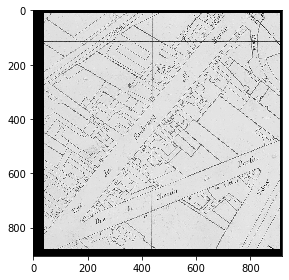

In [190]:
skimage.io.imshow(denoised)

In [191]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

gray = 1 - denoised

gray2 = opening(gray, square(4))

array([[0.95      , 0.95      , 0.95      , ..., 0.88918359, 0.88908935,
        0.88904909],
       [0.95      , 0.95      , 0.95      , ..., 0.88940016, 0.88934101,
        0.88931075],
       [0.95      , 0.95      , 0.95      , ..., 0.88932443, 0.88918965,
        0.8891191 ],
       ...,
       [0.95      , 0.95      , 0.95      , ..., 0.95      , 0.95      ,
        0.95      ],
       [0.95      , 0.95      , 0.95      , ..., 0.95      , 0.95      ,
        0.95      ],
       [0.95      , 0.95      , 0.95      , ..., 0.95      , 0.95      ,
        0.95      ]])

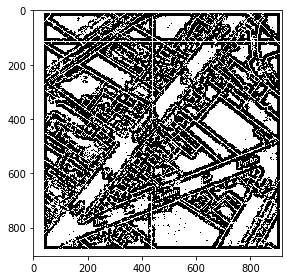

In [192]:
from skimage.filters import threshold_sauvola
from skimage.color import rgb2gray

gray = 1 - rgb2gray(denoised)

threshold = threshold_sauvola(gray, window_size=25, k=0.05)
binary = gray > threshold
#binary = binary_closing(binary)
binary = binary_closing(binary, square(3))

skimage.io.imshow(binary)
threshold

In [193]:
#binary = binary_closing(binary, square(3))
small = (remove_small_objects(binary, 50) * 255) - (remove_small_objects(binary, 400) * 255)

In [194]:
from skimage.measure import label
from skimage.measure import regionprops

label_image = label(small)
images = []

for i, region in enumerate(regionprops(label_image)):
    bbox = region.bbox
    ratio = region.minor_axis_length / region.major_axis_length

    if ratio < 0.25:
        small[label_image == i + 1] = 0
        continue

    total_count = denoised[label_image == i + 1].shape[0]
    black_count = np.sum(((denoised[label_image == i + 1]) <= 0.5))# - total_count / 3

    print(black_count, total_count)
    if black_count / total_count < 0.3:
        small[label_image == i + 1] = 0
        continue

    images.append(binary[bbox[0]:bbox[2],bbox[1]:bbox[3]])

50 145
53 115
5 312
75 161
39 181
0 76
0 85
0 279
0 124
59 207
0 92
51 190
55 191
0 81
32 161
0 58
0 341
0 196
0 60
0 63
0 127
0 360
0 93
0 61
0 185
0 66
0 119
62 157
78 160
72 228
0 71
0 198
35 109
0 73
71 269
0 61
14 92
0 178
73 147
0 71
0 65
0 50


In [195]:
import gc
gc.collect()

4842

In [1]:
z, y = 4000, 2000
skimage.io.imshow(gray[z:z+500,y:y+500])

NameError: name 'skimage' is not defined

In [196]:
skimage.io.imsave("small.png", small)
skimage.io.imsave("binary.png", binary * 255)
skimage.io.imsave("gray.png", gray)

<ipython-input-196-00cdabce4270>:1: UserWarning: small.png is a low contrast image
  skimage.io.imsave("small.png", small)
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-196-00cdabce4270>:2: UserWarning: binary.png is a low contrast image
  skimage.io.imsave("binary.png", binary * 255)
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
